In [343]:
task = 1
p = "models/cifar100/meta_cifar_T10_13"
with open(p + "/meta_task_test_list_"+str(task)+".pickle", 'rb') as handle:
    acc_task = pickle.load(handle)


In [ ]:
import torch
chunks = 100
correct = 0
correct2= 0
for class_id in range(10,11): 

    task_scores = []
    class_scores = []
    targets = []
    for t in range(task+1):
        list_1 = []
        list_2 = []
        list_3 = []
        list_4 = []
        for i in range(chunks):
            acc_task_0 = acc_task[class_id*chunks+i]
            list_1.append(acc_task_0[t][0].detach().cpu().numpy())
            list_2.append(acc_task_0[t][1][t*10:(t+1)*10].detach().cpu().numpy())
            list_4.append(acc_task_0[t][2].detach().cpu().numpy())
            list_3.append(acc_task_0[t][3].detach().cpu().numpy())
        list_1 = np.array(list_1)
        list_2 = np.array(list_2)
        list_3 = np.array(list_3)
        list_4 = np.array(list_4)


        task_scores.append(list_4)
        class_scores.append(list_2)
        targets.append(list_3)
#         confident = []

    m = task_scores[0]
    task_scores2 = []
    for t2 in range(task+1):
        mx = softmax(m)
        m2 = mx[:,t2*10:(t2+1)*10]
        m3 = np.max(m2, 1)
        task_scores2.append(np.mean(m3))

    pred_task = np.argmax(task_scores2)  
    if(pred_task == class_id//(1000//chunks)):
        correct2 += 1
        for j in range(chunks):

            pred_x = np.argmax(class_scores[pred_task][j])
            target_x = targets[0][j]
#                 print(pred_task, pred_x+pred_task*10,target_x)

            if(pred_x+pred_task*10==target_x):
                correct += 1
    else:
        print(pred_task, class_id, class_id//(1000//chunks))


print(correct/(t+1)/1000*100, correct2/(t+1)/(1000//chunks)*100)
print(targets[0])
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)**(1/2)
    return e_x / e_x.sum(axis=1, keepdims=True)

def sigmoid(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(-x)
    return 1 / (1+e_x)


cx = class_scores[1]
mx = task_scores[0]

# plt.figure(figsize=(16,10))
for i in range(10):

    mm = sigmoid(mx[i])  #/mx.mean(axis=0)
#     mm = softmax(mx)
#     mm = mm[i]
    plt.plot(mm,  "o-", linewidth=2, c="orangered", label="RPS net")
    mj = np.zeros_like(mm)
    mj[targets[0][i]] = mm[targets[0][i]]
    print(targets[0][i])
    plt.plot(mj,  "o", linewidth=0.5, c="black")
#     plt.ylim(0,0.2)
    plt.show()
    
    
task_scores2 = []
for t2 in range(task+1):
    mm = mx  #/mx.mean(axis=0, keepdims=True)
#     mm = softmax(mm)
    
#     my = softmax(mx)
    m2 = mm[:,t2*10:(t2+1)*10]
    m3 = np.max(m2, 1)
    task_scores2.append(np.mean(m3))
print(task_scores2)
plt.plot(task_scores2,  "o-", linewidth=2, c="orangered", label="RPS net")
plt.show()



In [608]:
##### import numpy as np
from collections import Counter

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)**(1/2) 
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def get_correct(acc_task, task, chunks, start_point, class_per_task):
        correct = 0
        correct2 = 0
        task_scores = []
        class_scores = []
        targets = []
        for t in range(task+1):
            list_2 = []
            list_3 = []
            list_4 = []
            for i in range(chunks):
                acc_task_0 = acc_task[start_point + i]
                list_2.append(acc_task_0[t][1][t*class_per_task:(t+1)*class_per_task].detach().cpu().numpy())
                list_4.append(acc_task_0[t][2].detach().cpu().numpy())
                list_3.append(acc_task_0[t][3].detach().cpu().numpy())
            list_2 = np.array(list_2)
            list_3 = np.array(list_3)
            list_4 = np.array(list_4)
            task_scores.append(list_4)
            class_scores.append(list_2)
            targets.append(list_3)
        m = task_scores[0]
        task_scores2 = []
        for t2 in range(task+1):
            m2 = m[:,t2*class_per_task:(t2+1)*class_per_task]
            m3 = np.max(m2, 1)
            task_scores2.append(np.mean(m3))
        pred_task = np.argmax(task_scores2)  
        if(pred_task == targets[0][0]//class_per_task):
            correct2 += chunks
            for j in range(chunks):
                pred_x = np.argmax(class_scores[pred_task][j])
                target_x = targets[0][j]
                if(pred_x+pred_task*class_per_task==target_x):
                    correct += 1 
        return correct, correct2
   
    
def get_mata_score(p, task, chunks):
    task_samples = {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
    total_samples = np.sum([task_samples[x] for x in range(task+1)])
    
    with open(p + "/meta_task_test_list_"+str(task)+".pickle", 'rb') as handle:
        acc_task = pickle.load(handle)
    correct = 0
    correct2= 0
    for tt in range(task+1):
        ctask_samples = np.sum([task_samples[x] for x in range(tt)])
        for class_id in range(task_samples[tt]//chunks):
            start_point = ctask_samples + class_id*chunks
            c, c2 = get_correct(acc_task, task, chunks, start_point, class_per_task)
            correct += c
            correct2 += c2

        new_chunk = task_samples[tt]-(class_id+1)*chunks
        if(new_chunk>0):
            start_point = ((task_samples[tt]//chunks)*chunks)
            c, c2 = get_correct(acc_task, t, new_chunk, start_point, class_per_task)
            correct += c
            correct2 += c2
    return correct/total_samples*100, correct2/total_samples*100

# print(get_mata_score("models/cifar100/meta2_cifar_T10_55", 5, 20) )           


# (79.5, 97.33333333333334)


(79.5, 97.33333333333334)


In [609]:
models_dic = [
#     ["results/cifar100/meta_twohead_T10_20",       "black",          "meta 17M, ex=2000, gamma=1, ontg",       "o-"   ], #todo
    
    
#     ["results/cifar100/meta_T10_0",       "m",          "meta 17M, ex=2000, gamma=1, ontgy, gradient correction, weight correction, final layer correction",       "o-"   ], #todo
#     ["results/cifar100/meta_cifar_T10_1",       "brown",          "meta 17M, ex=2000, gamma=1, ontgy, no - gradient correction, weight correction, final layer correction",       "o-"   ], #todo
#     ["results/cifar100/meta_cifar_T10_2",       "g",          "meta 17M, ex=2000, gamma=1, ontgy, no - gradient correction, no - weight correction, final layer correction (10)",       "o-"   ], #todo
#     ["results/cifar100/meta_cifar_T10_3",       "g",          "meta 17M, ex=2000, gamma=1, ontgy, no - gradient correction, no - weight correction, final layer correction (5)",       "D-"   ], #todo
    
    
#     different backends
#     ["results/cifar100/meta_cifar_T10_4",       "cyan",          "meta 0.47M, ex=2000, gamma=1, ontgy, no - gradient correction, no - weight correction, final layer correction (10)",       "D-"   ], #todo+
    
    
    
#     Data argumentation case
#     ["results/cifar100/meta_cifar_T10_5",       "cyan",          "meta 11.22M, ex=2000, gamma=1, ontgy, no - gradient correction, no - weight correction, final layer correction (10)",       "D-"   ], #todo
    
    
    
    #start again
#     ["results/cifar100/meta_cifar_T10_10",       "m",          "meta 11.22M, ex=2000, gamma=1, ontgy, no - gradient correction, no - weight correction, final layer correction (5)",       "D-"   ], #todo
#     ["results/cifar100/meta_cifar_T10_11",       "m",          "meta 11.22M, ex=2000, gamma=1, ontgy, no - gradient correction, no - weight correction, no - final layer correction (5)",       "D-"   ], #todo
    
#     ["results/cifar100/meta_cifar_T10_13",       "brown",          "meta 1.25M, ex=2000, gamma=1, ontgy, no - gradient correction, no - weight correction, no - final layer correction (5)",       "D-"   ], #todo
   
    
    
# #     ["results/cifar100/meta_cifar_T10_20",       "brown",          "meta 1.25M, ex=2000, gamma=1, ontgy, no - gradient correction, no - weight correction, no - final layer correction (5)",       "D-"   ], #todo
# #     ["results/cifar100/meta_cifar_T10_21",       "m",          "meta 1.25M, ex=2000, gamma=1, ontgy, no - gradient correction, no - weight correction, no - final layer correction (5)",       "D-"   ], #todo
#     ["results/cifar100/meta_cifar_T10_22",       "m",          "meta 1.25M, ex=2000, 50ep, reweight(x)",       "D-"   ], #todo
# #     ["results/cifar100/meta_cifar_T10_23",       "m",          "meta 1.25M, ex=2000, 50ep, reweight(1/x)",       "D-"   ], #todo
    
    
# #     # optimizers
# #     ["results/cifar100/meta2_cifar_T10_24",       "m",          "1.25M, ex=2000a, 50ep, SGD",       "D-"   ], #todo
# #     ["results/cifar100/meta2_cifar_T10_24_1",       "m",          "1.25M, ex=2000a, 50ep, SGD",       "*-"   ], #todo
# #     ["results/cifar100/meta2_cifar_T10_25",       "m",          "1.25M, ex=2000a, 50ep, Adam",       "D-"   ], #todo
    
    
# #     #contibutions
# #     ["results/cifar100/meta2_cifar_T10_30",       "g",          "1.25M, ex=2000a, 50ep, RAdam, fc(1)",       "D-"   ], #todo
# #     ["results/cifar100/meta2_cifar_T10_31",       "g",          "1.25M, ex=2000a, 50ep, RAdam, bi tasks",       "D-"   ], #todo
    
#     #new updates
# #     ["results/cifar100/meta2_cifar_T10_40",       "g",          "1.25M, ex=2000a, 50ep, RAdam, uni tasks",       "D-"   ], #todo
# #     ["results/cifar100/meta2_cifar_T10_41",       "brown",          "1.25M, ex=2000a, 50ep, RAdam, bi tasks",       "D-"   ], #todo
    
    
#     ["results/cifar100/meta2_cifar_T10_50",       "brown",          "1.25M, ex=2000a, 70ep, RAdam, reptile, r=2, bs=128",       "D-"   ], #todo
# #     ["results/cifar100/meta2_cifar_T10_51",       "brown",          "1.25M, ex=2000a, 70ep, RAdam, reptile, r=2, bs=256",       "D-"   ], #todo
    
#     ["results/cifar100/meta2_cifar_T10_52",       "green",          "1.25M, ex=2000a, 70ep, RAdam, FOMAML, r=2, bs=256",       "D-"   ], #todo
    
#     ["results/cifar100/meta2_cifar_T10_53",       "black",          "1.25M, ex=2000a, 70ep, RAdam, joint, bs=256",       "D-"   ], #todo
#     ["results/cifar100/meta2_cifar_T10_54",       "black",          "1.25M, ex=2000a, 70ep, RAdam, joint, bs=256",       "D-"   ], #todo
    
    
    
    ["results/cifar100/meta2_cifar_T10_55",       "forestgreen",          "1.25M, ex=2000a, 70ep, RAdam, iReptile, bs=256, r=1",       "D-"   ], #todo
#     ["results/cifar100/meta2_cifar_T10_56",       "steelblue",          "1.25M, ex=2000a, 70ep, RAdam, iReptile, bs=256, r=2",       "s-"   ], #todo
#     ["results/cifar100/meta2_cifar_T10_57",       "gold",          "1.25M, ex=2000a, 70ep, RAdam, iReptile, bs=256, r=3",       "*-"   ], #todo
#     ["results/cifar100/meta2_cifar_T10_58",       "orange",          "1.25M, ex=2000a, 70ep, RAdam, iReptile, bs=256, r=4",       "+-"   ], #todo
#     ["results/cifar100/meta2_cifar_T10_59",       "brown",          "1.25M, ex=2000a, 70ep, RAdam, iReptile, bs=256, r=5",       "<-"   ], #todo
    
    ["results/cifar100/meta2_cifar_T10_60",       "brown",          "1.25M, ex=2000a, 70ep, RAdam, iReptile, bs=256, r=1",       "<-"   ], #todo
    

]

89.1,84.15,84.36666666666667,83.92500000000001,83.46000000000001,79.5,80.75714285714287,78.6875,78.87777777777778,78.22
100.0,100.0,100.0,100.0,100.0,97.33333333333334,99.42857142857143,98.0,99.33333333333333,98.6
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


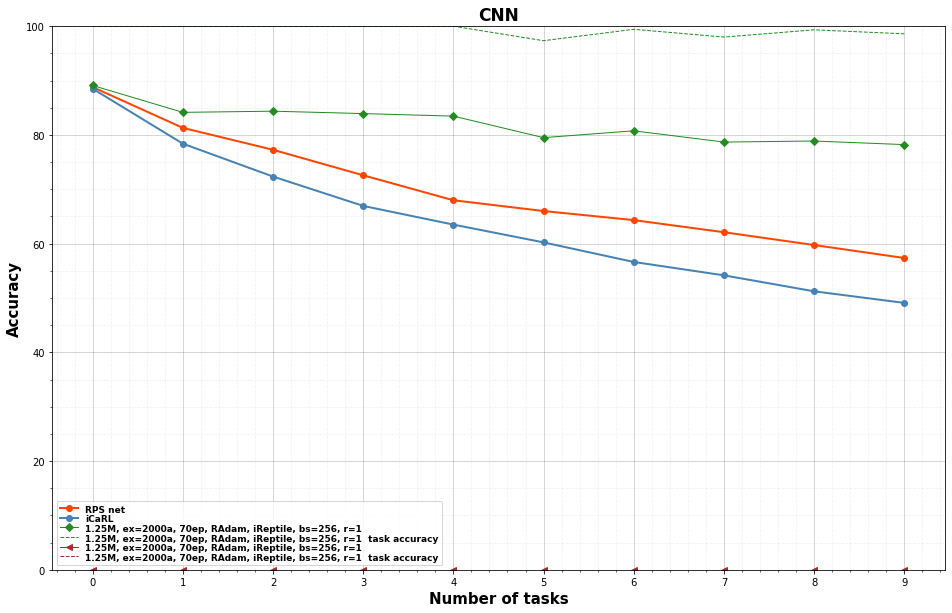

In [612]:
import matplotlib.pyplot as plt 
import numpy as np
import pickle
x = range(10)
icarl = [88.5, 78.39, 72.34, 66.94, 63.50, 60.23, 56.63, 54.17, 51.23, 49.10]
ours = [88.8, 81.3, 77.266667, 72.575, 67.98, 66.0, 64.328571, 62.1, 59.744444, 57.36]

chunks = 20

plt.figure(figsize=(16,10))

plt.plot(x, ours,  "o-", linewidth=2, c="orangered", label="RPS net")
plt.plot(x, icarl, "o-", linewidth=2, c="steelblue", label="iCaRL")

for i,p in enumerate(models_dic):
    z = np.zeros_like(icarl)
    z2 = np.zeros_like(icarl)
    ps = "models/" + "/".join(p[0].split("/")[1:])
    try:
        z = np.load(p[0]+"/meta_e"+str(chunks)+".npy")
        z2 = np.load(p[0]+"/meta_task_"+str(chunks)+".npy")
        if(np.sum(z>0)<10):
            for j in range(np.sum(z>0), 10):
                try:
                    z[j], z2[j] = get_mata_score(ps , j, chunks)
                except Exception as e:
                    pass
            np.save(p[0]+"/meta_"+str(chunks)+".npy", z)
            np.save(p[0]+"/meta_task_"+str(chunks)+".npy", z2)
    except:
        for j in range(10):
            try:
                z[j], z2[j] = get_mata_score(ps , j, chunks)
            except Exception as e:
#                 print(e)
                pass
        np.save(p[0]+"/meta_"+str(chunks)+".npy", z)
        np.save(p[0]+"/meta_task_"+str(chunks)+".npy", z2)
        
    plt.plot(x, z, p[3], linewidth=1, c = p[1], label=p[2])
    plt.plot(x, z2, "--", linewidth=1, c = p[1], label=p[2] + "  task accuracy")
    print(",".join([str(i) for i in z]) )
    print(",".join([str(i) for i in z2]) )
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([0,100])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, prop={'size': 9, "weight":"bold"})

plt.xlabel("Number of tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy", fontweight='bold', fontsize=15)
plt.title("CNN", fontweight='bold', fontsize=17) 
plt.xticks(range(10))
# plt.savefig("meta_10.pdf")
plt.show()

[43.9, 33.2, 47.4, 37.1, 39.5, 33.6, 33.1, 30.5, 25.0, 23.1]
88.89999999999999,75.55,66.66666666666667,57.25,53.02,47.68333333333333,43.771428571428565,39.375,37.099999999999994,34.64


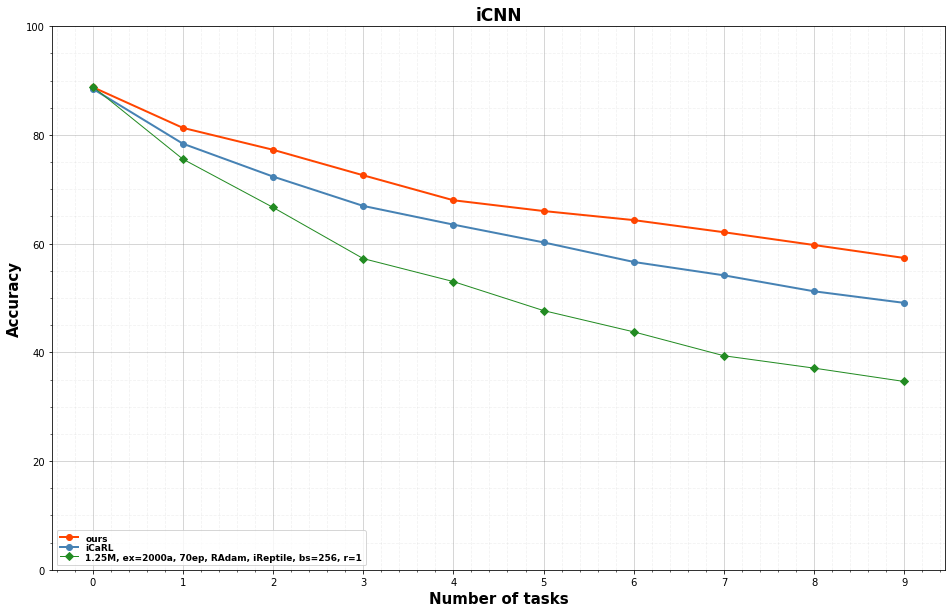

In [555]:
import matplotlib.pyplot as plt 
import numpy as np
import pickle
x = range(10)
icarl = [88.5, 78.39, 72.34, 66.94, 63.50, 60.23, 56.63, 54.17, 51.23, 49.10]
ours = [88.8, 81.3, 77.266667, 72.575, 67.98, 66.0, 64.328571, 62.1, 59.744444, 57.36]

plt.figure(figsize=(16,10))

plt.plot(x, ours,  "o-", linewidth=2, c="orangered", label="ours")
plt.plot(x, icarl, "o-", linewidth=2, c="steelblue", label="iCaRL")

for i,p in enumerate(models_dic):
    z = np.zeros_like(icarl)
    ps = "models/" + "/".join(p[0].split("/")[1:])
    for j in range(len(icarl)):
        try:
#             with open(ps + "/acc_task_"+str(j)+".pickle", 'rb') as handle:
            with open(ps + "/acc_task_test_"+str(j)+".pickle", 'rb') as handle:
                acc_task = pickle.load(handle)
#             if(j==9):
#                 print([np.around(x,2) for x in acc_task.values()])
#             print(acc_task)
            z[j] = np.sum([acc_task[x] for x in range(j+1)])/(j+1)
        except Exception as e:
#             print(e)
            pass
    plt.plot(x, z, p[3], linewidth=1, c = p[1], label=p[2])
    print(",".join([str(i) for i in z]) )
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([0,100])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, prop={'size': 9, "weight":"bold"})

plt.xlabel("Number of tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy", fontweight='bold', fontsize=15)
plt.title("iCNN", fontweight='bold', fontsize=17) 
plt.xticks(range(10))
# plt.savefig("reptile.pdf")
plt.show()

89.1,75.55,66.9,57.55,53.5,48.45,43.928571,39.7625,37.188889,34.99


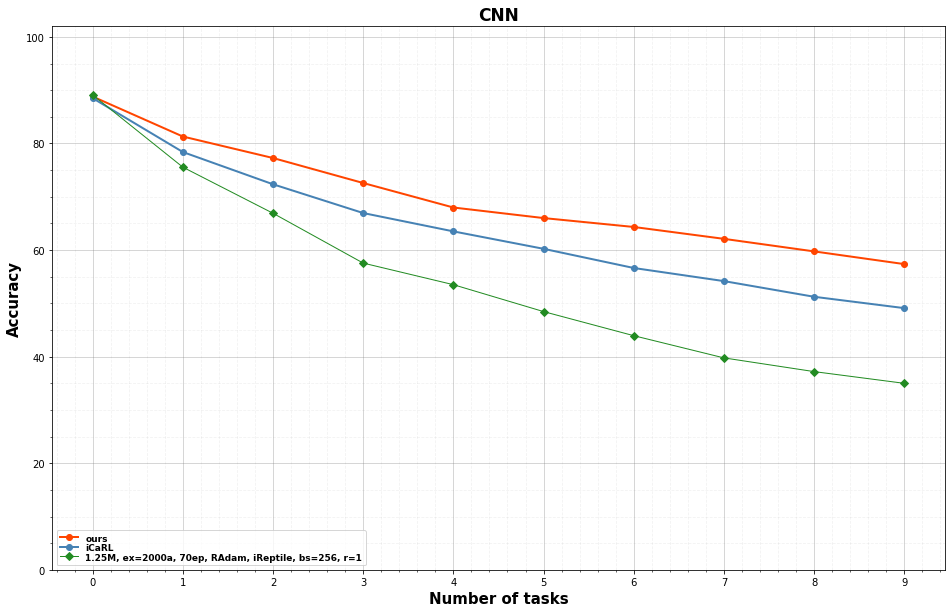

In [505]:
import matplotlib.pyplot as plt 
import numpy as np
x = range(10)
icarl = [88.5, 78.39, 72.34, 66.94, 63.50, 60.23, 56.63, 54.17, 51.23, 49.10]
ours = [88.8, 81.3, 77.266667, 72.575, 67.98, 66.0, 64.328571, 62.1, 59.744444, 57.36]

plt.figure(figsize=(16,10))

plt.plot(x, ours,  "o-", linewidth=2, c="orangered", label="ours")
plt.plot(x, icarl, "o-", linewidth=2, c="steelblue", label="iCaRL")

for i,p in enumerate(models_dic):
    z = np.zeros_like(icarl)
    for j in range(len(icarl)):
        try:
            z[j] = find_best(p[0], j)

        except Exception as e:
#             print(e)
            pass

    plt.plot(x, z, p[3], linewidth=1, c = p[1], label=p[2])
    print(",".join([str(i) for i in z]) )
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([0,102])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, prop={'size': 9, "weight":"bold"})

plt.xlabel("Number of tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy", fontweight='bold', fontsize=15)
plt.title("CNN", fontweight='bold', fontsize=17) 
plt.xticks(range(10))
# plt.savefig("reptile.pdf")
plt.show()

In [583]:
import scipy

def comb(a,b):
    aa = scipy.math.factorial(a)
    bb = scipy.math.factorial(b)
    ab = scipy.math.factorial(a-b)
    return aa/bb/ab

def binomial_prob(n,r,p):
    
    return comb(n,r)* (p**(r))* ((1-p)**(n-r))

num_task = 20
total_num_class = 100
p0 = 20/100
p0_hat = p0 + (1-p0)/99*(total_num_class//num_task-1)
print("P0_hat = ", p0_hat)
print("mean = ", int(p0_hat*chunk))


for chunk in range(1,20):
    p = 0
#     for j in range(2*(int(chunk/10)),chunk):
    for j in range(max(int(chunk/num_task)*2,2),chunk):
        p += binomial_prob(chunk,j, p0_hat)
    print(chunk, p)


P0_hat =  0.23232323232323232
mean =  4
1 0
2 0
3 0.12430395166850632
4 0.22935543944222717
5 0.32926617269331754
6 0.4235136378623435
7 0.5099776211987587
8 0.5873366790791679
9 0.6551891637841679
10 0.7137849238850504
11 0.763764655258613
12 0.8059695465022989
13 0.8413146401450827
14 0.870709369947693
15 0.895010837808424
16 0.914999057522178
17 0.9313665154108184
18 0.9447167398685422
19 0.9555682592064003


In [614]:



import scipy

def comb(a,b):
    aa = scipy.math.factorial(a)
    bb = scipy.math.factorial(b)
    ab = scipy.math.factorial(a-b)
    return aa/bb/ab

def binomial_prob(n,r,p):
    
    return comb(n,r)* (p**(r))* ((1-p)**(n-r))


def get_correct(acc_task, task, chunks, start_point, class_per_task):
    correct = 0
    correct2 = 0
    task_scores = []
    task_scores2 = []
    class_scores = []
    class_scores_base = []
    targets = []
    for t in range(task+1):
        list_1 = []
        list_2 = []
        list_3 = []
        list_4 = []
        for i in range(chunks):
            acc_task_0 = acc_task[start_point + i]
            list_1.append(acc_task_0[t][0].detach().cpu().numpy())
            list_2.append(acc_task_0[t][1][t*class_per_task:(t+1)*class_per_task].detach().cpu().numpy())
            list_4.append(acc_task_0[t][2].detach().cpu().numpy())
            list_3.append(acc_task_0[t][3].detach().cpu().numpy())
        list_1 = np.array(list_1)
        list_2 = np.array(list_2)
        list_3 = np.array(list_3)
        list_4 = np.array(list_4)

        task_scores.append(list_4)
        class_scores.append(list_2)
        targets.append(list_3)
    m = task_scores[0]
    task_scores2 = []
    for t2 in range(task+1):
        m2 = m[:,t2*class_per_task:(t2+1)*class_per_task]
        m3 = np.max(m2, 1)
        task_scores2.append(np.mean(m3))

    pred_task = np.argmax(task_scores2)  
    if(pred_task == targets[0][0]//class_per_task):
        correct2 += chunks
        for j in range(chunks):
            pred_x = np.argmax(class_scores[pred_task][j])
            target_x = targets[0][j]
            if(pred_x+pred_task*class_per_task==target_x):
                correct += 1 
    return correct, correct2
                            
num_task = 10
total_num_class = 100
class_per_task = total_num_class//num_task

for t in range(num_task):
    task = t
    ps = "results/cifar100/meta2_cifar_T10_55"
    
    task_samples = {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
    total_samples = np.sum([task_samples[x] for x in range(t+1)])

    with open("models/" + "/".join(ps.split("/")[1:]) + "/meta_task_test_list_"+str(t)+".pickle", 'rb') as handle:
        acc_task = pickle.load(handle)
    
    with open("models/" + "/".join(ps.split("/")[1:]) + "/acc_task_test_"+str(t)+".pickle", 'rb') as handle:
        acc_test = pickle.load(handle)
    
    range_acc = max(acc_test.values())-min(acc_test.values())
    p0 = np.mean(list(acc_test.values()))
    p0_min = (p0 - range_acc/2)/(class_per_task*(t+1))

    p0_hat = p0_min + (1-p0_min)/((class_per_task*(t+1))-1)*(class_per_task-1)

    found = 0
    for chunk in range(2,50):
        p = 0
        
        for j in range(max(2*(int(chunk/(task+1))),2),chunk):
            p += binomial_prob(chunk,j, p0_hat)
            if(p>=0.95):
                found = 1
                break
        if(found == 1):       
            break
    
    for chunks in [chunk]:
        correct = 0
        correct2= 0
        for tt in range(task+1):
            ctask_samples = np.sum([task_samples[x] for x in range(tt)])
            for class_id in range(task_samples[tt]//chunks):
                start_point = ctask_samples + class_id*chunks
                c, c2 = get_correct(acc_task, t, chunks, start_point, class_per_task)
                correct += c
                correct2 += c2
            
            new_chunk = task_samples[tt]-(class_id+1)*chunks
            if(new_chunk>0):
                start_point = ((task_samples[tt]//chunks)*chunks)
                c, c2 = get_correct(acc_task, t, new_chunk, start_point, class_per_task)
                correct += c
                correct2 += c2
    
    print("task = ", t, "\t", 
          "chunk = ", chunk, "\t", 
          "predicted accuracy = ", p, "\t", 
          "actual task accuracy = ", correct2/total_samples*100)



task =  0 	 chunk =  49 	 predicted accuracy =  0 	 actual task accuracy =  100.0
task =  1 	 chunk =  49 	 predicted accuracy =  -1.9881967537370333e+20 	 actual task accuracy =  100.0
task =  2 	 chunk =  4 	 predicted accuracy =  10.238206959118793 	 actual task accuracy =  94.93333333333334
task =  3 	 chunk =  6 	 predicted accuracy =  1.2909768331717886 	 actual task accuracy =  94.3
task =  4 	 chunk =  49 	 predicted accuracy =  0.9234833202076582 	 actual task accuracy =  100.0
task =  5 	 chunk =  8 	 predicted accuracy =  0.9509531599130997 	 actual task accuracy =  91.06666666666666
task =  6 	 chunk =  8 	 predicted accuracy =  0.9697890921559272 	 actual task accuracy =  90.97142857142858
task =  7 	 chunk =  11 	 predicted accuracy =  0.9612798259052994 	 actual task accuracy =  92.71249999999999
task =  8 	 chunk =  13 	 predicted accuracy =  0.9511446431779251 	 actual task accuracy =  95.52222222222223
task =  9 	 chunk =  15 	 predicted accuracy =  0.958584730194641 

In [1]:
import incremental_dataloader as data

class args:

    checkpoint = "results/cifar100/meta2_cifar_T10_63"
#     checkpoint = "results/cifar100/meta2_cifar_T20_14"
#     checkpoint = "results/cifar100/meta2_cifar_T2_10"
    savepoint = "models/" + "/".join(checkpoint.split("/")[1:])
    data_path = "../Datasets/CIFAR100/"
    num_class = 100
    class_per_task = 10
    num_task = 10
    test_samples_per_class = 100
    dataset = "cifar100"
    optimizer = "radam"
    
    epochs = 70
    lr = 0.01
    train_batch = 128
    test_batch = 100
    workers = 16
    sess = 0
    schedule = [20,40,60]
    gamma = 0.2
    random_classes = False
    validation = 0
    memory = 2000
    mu = 1
    beta = 1.0
    r = 2
    overflow = False
    
    
    
inc_dataset = data.IncrementalDataset(
                        dataset_name=args.dataset,
                        args = args,
                        random_order=args.random_classes,
                        shuffle=True,
                        seed=1,
                        batch_size=args.train_batch,
                        workers=args.workers,
                        validation_split=args.validation,
                        increment=args.class_per_task,
                    )





Files already downloaded and verified
Files already downloaded and verified


In [5]:
import scipy.misc
from PIL import Image
import numpy as np

for ses in range(0, 1):
        args.sess=ses 

            
        if(ses!=0): 
            inc_dataset._current_task = ses
            with open(args.savepoint + "/sample_per_task_testing_"+str(args.sess-1)+".pickle", 'rb') as handle:
                sample_per_task_testing = pickle.load(handle)
            inc_dataset.sample_per_task_testing = sample_per_task_testing
            args.sample_per_task_testing = sample_per_task_testing
        
        
        if ses>0:            
            with open(args.savepoint + "/memory_"+str(args.sess-1)+".pickle", 'rb') as handle:
                memory = pickle.load(handle)
        
        memory=None
            
        task_info, train_loader, val_loader, test_loader, for_memory = inc_dataset.new_task(memory)
        print(task_info)
        print(inc_dataset.sample_per_task_testing)
        
        for i, (img, t) in enumerate(train_loader):
            print(np.transpose(img[0].detach().cpu().numpy(), (1, 2, 0)).shape)
#             print(np.transpose(img[0].detach().cpu().numpy(), (1, 2, 0)))
            im = Image.fromarray((np.transpose(img[0].detach().cpu().numpy(), (1, 2, 0))*255).astype(np.uint8))
            im.save("imgs/" + str(ses)+ '_' + str(i) + '.jpg')


3
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
{'min_class': 30, 'max_class': 40, 'task': 3, 'max_task': 10, 'n_train_data': 5000, 'n_test_data': 4000}
{0: 1000, 1: 1000, 2: 1000, 3: 1000}
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [108]:
a = np.load("results/cifar100/meta_twohead_1/seed.npy")
print(a)

7572
